<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/006_Emails_Department_Emergency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


Créer un modèle qui prend les entrées suivantes :
 * Le titre d'un ticket
 * Le contenu d'un ticket
 * Les tags du ticket entrés par le user
 

Qui renvoie les deux sorties suivantes :
 * Le département vers lequel router le ticket
 * Le niveau d'urgence du ticket entre 0 et 1

Pour ce faire, utilisez l'API fonctionnelle de Tensorflow

In [23]:
# Parameters
vocabulary_size = 1000
tags_size = 12
batch_size = 64
departments_size = 4
embedding_size = 64
main_reduction_size = 32
title_reduction_size = 128

In [24]:
# Définition des layers inputs
# Titre du ticket, entrée de taille variable
input_title = tf.keras.layers.Input(shape=(None,))

# Contenu du ticket, entrée de taille variable
input_main = tf.keras.layers.Input(shape = (None,))

# Les tags, entrée de taille égale au nombre de tags, vecteur de 0 et de 1
input_tags = tf.keras.layers.Input(shape = (tags_size,))

In [25]:
# Création des features textuelles
title_features = tf.keras.layers.Embedding(input_dim = vocabulary_size, output_dim = embedding_size)(input_title)
main_features = tf.keras.layers.Embedding(input_dim= vocabulary_size, output_dim = embedding_size)(input_main)

In [26]:
# Réduction des entrées main et title en un vecteur de 128 dimensions via un LSTM
title_reduction = tf.keras.layers.LSTM(units = title_reduction_size)(title_features)
main_reduction = tf.keras.layers.LSTM(units = main_reduction_size)(main_features)

In [27]:
# Concaténation de toutes les features encodés, title, body, tags
all_features = tf.keras.layers.concatenate([title_reduction,main_reduction,input_tags])

In [28]:
# Les layers de sorties

# Layer qui prédit le degré d'urgence
output_emergency = tf.keras.layers.Dense(units = 1,name = "priority")(all_features)

# Layer qui prédit le département
output_department = tf.keras.layers.Dense(units = 4,name = "department")(all_features)

In [29]:
# Instanciation du modèle
model = tf.keras.Model(inputs = [input_main,input_title,input_tags],
                       outputs = [output_emergency,output_department])

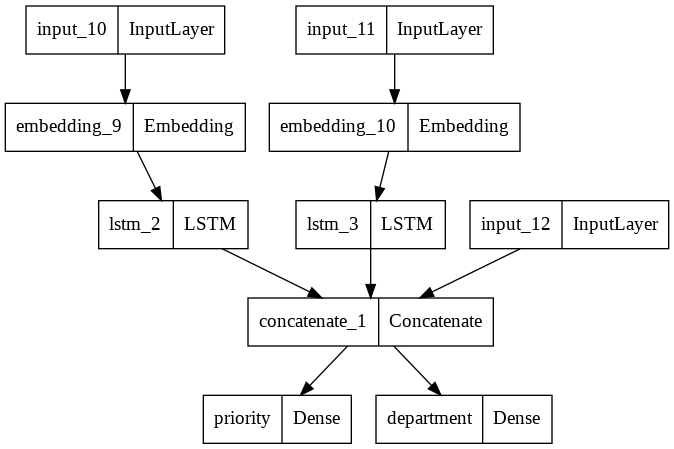

In [30]:
# plot le model
tf.keras.utils.plot_model(model)

In [31]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": tf.keras.losses.BinaryCrossentropy(from_logits=True),
        "department": tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)

# Simulation de données

In [32]:
import numpy as np

In [52]:
# Parameters
body_len = 100
title_len = 10
training_size = 1500
testing_size = 1500
tags_size =12

In [53]:
# Datasets features
bodies_training = np.random.randint(low=0,high=vocabulary_size-1,size= (training_size,body_len))
titles_training = np.random.randint(low=0,high=vocabulary_size-1,size= (training_size,title_len))
tags_training = np.random.randint(2, size=(training_size, tags_size)).astype("float32")


In [56]:
# Datasets labels
emergency_labels = np.random.uniform(size = (training_size,1))
department_labels = np.random.randint(2, size=(training_size, departments_size))

In [57]:
# Training
model.fit(x=[bodies_training,titles_training,tags_training],
          y=[emergency_labels,department_labels])

47/47 [==============================] - 7s 60ms/step - loss: 1.2824 - priority_loss: 0.7045 - department_loss: 2.8897
